# Projet DVF

### Import et chargement des données

In [80]:
#!pip install Django==4.2
import pandas as pd
from datetime import datetime
import numpy as np

valeursfoncieres_2022=pd.read_csv("valeursfoncieres-2022.txt", sep="|")
#valeursfoncieres_2021=pd.read_csv("valeursfoncieres-2021.txt", sep="|")
#valeursfoncieres_2020=pd.read_csv("valeursfoncieres-2020.txt", sep="|")
#valeursfoncieres_2018=pd.read_csv("valeursfoncieres-2018.txt", sep="|")


#Pour lire http://www.groupe-dvf.fr/fiche-n4-qualite-et-exhaustivite-des-donnees-dvf/

c:\Users\enzoy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Nettoyage du jeu de données 

In [81]:

VF_2022 = valeursfoncieres_2022.copy()

VF_2022 = VF_2022.dropna(axis=1, how='all') #Supprime les colonnes vide
VF_2022["Date mutation"] = pd.to_datetime(VF_2022["Date mutation"].str.strip(), format="%d/%m/%Y")#Convertit Date mutation en datetime 


VF_2022["Valeur fonciere"] = VF_2022["Valeur fonciere"].astype(str).str.replace(",",".")
VF_2022["Valeur fonciere"] = VF_2022["Valeur fonciere"].replace("nan", np.nan)
VF_2022["Valeur fonciere"] = pd.to_numeric(VF_2022["Valeur fonciere"])
VF_2022["Commune"] = VF_2022["Commune"].str.replace('-',' ')
VF_2022['Code departement'] = VF_2022['Code departement'].astype(str)
VF_2022['Surface reelle bati'] = VF_2022['Surface reelle bati'].astype(float)
VF_2022['Surface Carrez du 1er lot'] = VF_2022['Surface Carrez du 1er lot'].str.replace(',', '.').astype(float)
VF_2022['Surface Carrez du 2eme lot'] = VF_2022['Surface Carrez du 2eme lot'].str.replace(',', '.').astype(float)
VF_2022['Metre carre'] = VF_2022['Surface Carrez du 1er lot'].astype(float) + VF_2022['Surface Carrez du 2eme lot'].astype(float)

VF_2022 = VF_2022.drop_duplicates(subset=['Date mutation', 'Valeur fonciere', 'Surface reelle bati', 'Metre carre'], keep='first')
VF_2022 = VF_2022.drop(['No disposition', 'No voie', 'B/T/Q', 'Code voie'], axis=1)

In [82]:
VF_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1648228 entries, 0 to 3803883
Data columns (total 32 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   Date mutation               1648228 non-null  datetime64[ns]
 1   Nature mutation             1648228 non-null  object        
 2   Valeur fonciere             1646179 non-null  float64       
 3   Type de voie                1323589 non-null  object        
 4   Voie                        1637234 non-null  object        
 5   Code postal                 1637227 non-null  float64       
 6   Commune                     1648228 non-null  object        
 7   Code departement            1648228 non-null  object        
 8   Code commune                1648228 non-null  int64         
 9   Prefixe de section          67357 non-null    float64       
 10  Section                     1648135 non-null  object        
 11  No plan                 

In [83]:
region = {
   '01': 'Auvergne-Rhône-Alpes', '02': 'Hauts-de-France', '03': 'Auvergne-Rhône-Alpes',
    '04': 'Provence-Alpes-Côte d\'Azur', '05': 'Provence-Alpes-Côte d\'Azur',
    '06': 'Provence-Alpes-Côte d\'Azur', '07': 'Auvergne-Rhône-Alpes',
    '08': 'Grand Est', '09': 'Occitanie','10': 'Grand Est', '11': 'Occitanie',
    '12': 'Occitanie','13': 'Provence-Alpes-Côte d\'Azur',
    '14': 'Normandie','15': 'Auvergne-Rhône-Alpes',
    '16': 'Nouvelle-Aquitaine', '17': 'Nouvelle-Aquitaine',
    '18': 'Centre-Val de Loire', '19': 'Nouvelle-Aquitaine',
    '21': 'Bourgogne-Franche-Comté', '22': 'Bretagne',
    '23': 'Nouvelle-Aquitaine', '24': 'Nouvelle-Aquitaine',
    '25': 'Bourgogne-Franche-Comté','26': 'Auvergne-Rhône-Alpes',
    '27': 'Normandie', '28': 'Centre-Val de Loire',
    '29': 'Bretagne', '2A': 'Corse','2B': 'Corse','30': 'Occitanie',
    '31': 'Occitanie','32': 'Occitanie','33': 'Nouvelle-Aquitaine', '34': 'Occitanie',
    '35': 'Bretagne','36': 'Centre-Val de Loire',
    '37': 'Centre-Val de Loire','38': 'Auvergne-Rhône-Alpes',
    '39': 'Bourgogne-Franche-Comté','40': 'Nouvelle-Aquitaine',
    '41': 'Centre-Val de Loire', '42': 'Auvergne-Rhône-Alpes',
    '43': 'Auvergne-Rhône-Alpes', '44': 'Pays de la Loire',
    '45': 'Centre-Val de Loire', '46': 'Occitanie','47': 'Nouvelle-Aquitaine','48': 'Occitanie',
    '49': 'Pays de la Loire','50': 'Normandie',
    '51': 'Grand Est','52': 'Grand Est','53': 'Pays de la Loire','54': 'Grand Est',
    '55': 'Grand Est','56': 'Bretagne','57': 'Grand Est','58': 'Bourgogne-Franche-Comté',
    '59': 'Hauts-de-France','60': 'Hauts-de-France','61': 'Normandie','62': 'Hauts-de-France',
    '63': 'Auvergne-Rhône-Alpes','64': 'Nouvelle-Aquitaine',
    '65': 'Occitanie','66': 'Occitanie','67': 'Grand Est','68': 'Grand Est',
    '69': 'Auvergne-Rhône-Alpes','70': 'Bourgogne-Franche-Comté',
    '71': 'Bourgogne-Franche-Comté','72': 'Pays de la Loire',
    '73': 'Auvergne-Rhône-Alpes','74': 'Auvergne-Rhône-Alpes',
    '75': 'Île-de-France','76': 'Normandie','77': 'Île-de-France','78': 'Île-de-France',
    '79': 'Nouvelle-Aquitaine','80': 'Hauts-de-France',
    '81': 'Occitanie','82': 'Occitanie','83': 'Provence-Alpes-Côte d\'Azur','84': 'Provence-Alpes-Côte d\'Azur',
    '85': 'Pays de la Loire','86': 'Nouvelle-Aquitaine',
    '87': 'Nouvelle-Aquitaine','88': 'Grand Est','89': 'Bourgogne-Franche-Comté','90': 'Bourgogne-Franche-Comté',
    '91': 'Île-de-France','92': 'Île-de-France','93': 'Île-de-France','94': 'Île-de-France',
    '95': 'Île-de-France','971': 'Guadeloupe', '972': 'Martinique','973': 'Guyane','974': 'La Réunion','976': 'Mayotte'
}

VF_2022['Region'] = VF_2022['Code departement'].map(region)

print(VF_2022["Region"])


0                    NaN
1                    NaN
3                    NaN
4                    NaN
5                    NaN
               ...      
3803873    Île-de-France
3803878    Île-de-France
3803880    Île-de-France
3803882    Île-de-France
3803883    Île-de-France
Name: Region, Length: 1648228, dtype: object


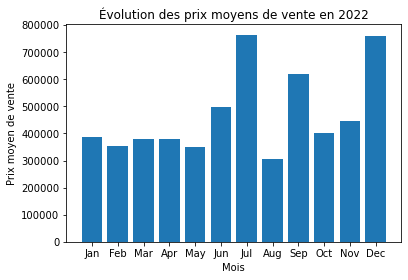

In [84]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import calendar

VF_2022['Date mutation'] = pd.to_datetime(VF_2022['Date mutation'])

valeursfoncieres_2022_filtrer = VF_2022[VF_2022['Date mutation'].dt.year == 2022]
monthly_prices = VF_2022.groupby(VF_2022['Date mutation'].dt.month)['Valeur fonciere'].mean()

# Créer un diagramme en bâtons
plt.bar(monthly_prices.index, monthly_prices.values)

# Formater l'axe Y en entiers
formatter = ticker.FuncFormatter(lambda x, pos: '{:1.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Remplacer les étiquettes des mois
months = [calendar.month_abbr[i] for i in range(1, 13)]
plt.xticks(monthly_prices.index, months)

# Ajout des labels et titre
plt.xlabel('Mois')
plt.ylabel('Prix moyen de vente')
plt.title("Évolution des prix moyens de vente en 2022")

# Affichage du diagramme en bâtons
plt.show()


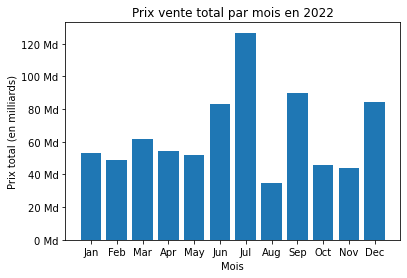

In [85]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import calendar

VF_2022['Date mutation'] = pd.to_datetime(VF_2022['Date mutation'])

valeursfoncieres_2022_filtrer = VF_2022[VF_2022['Date mutation'].dt.year == 2022]
monthly_prices = VF_2022.groupby(VF_2022['Date mutation'].dt.month)['Valeur fonciere'].sum()

# Diviser les valeurs par 1 milliard pour mettre en milliards
monthly_prices = monthly_prices / 1e9

# Créer un diagramme en bâtons
plt.bar(monthly_prices.index, monthly_prices.values)

# Formater l'axe Y en milliards
formatter = ticker.FuncFormatter(lambda x, pos: '{:1.0f} Md'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Remplacer les étiquettes des mois
months = [calendar.month_abbr[i] for i in range(1, 13)]
plt.xticks(monthly_prices.index, months)

# Ajout des labels et titre
plt.xlabel('Mois')
plt.ylabel('Prix total (en milliards)')
plt.title("Prix vente total par mois en 2022")

# Affichage du diagramme en bâtons
plt.show()


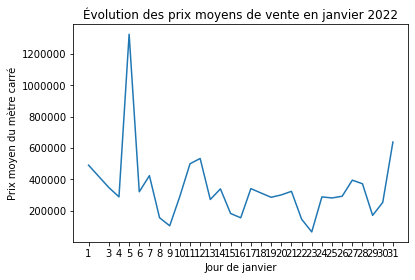

In [86]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import calendar

VF_2022['Date mutation'] = pd.to_datetime(VF_2022['Date mutation'])

valeursfoncieres_janvier = VF_2022[VF_2022['Date mutation'].dt.month == 1]
monthly_prices = valeursfoncieres_janvier.groupby(valeursfoncieres_janvier['Date mutation'].dt.day)['Valeur fonciere'].mean()
plt.plot(monthly_prices.index, monthly_prices.values)

# Formater l'axe Y en entiers
formatter = ticker.FuncFormatter(lambda x, pos: '{:1.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Remplacer les étiquettes des jours
days = [str(day) for day in monthly_prices.index]
plt.xticks(monthly_prices.index, days)

# Ajout des labels et titre
plt.xlabel('Jour de janvier')
plt.ylabel('Prix moyen du mètre carré')
plt.title("Évolution des prix moyens de vente en janvier 2022")

# Affichage du graphique
plt.show()

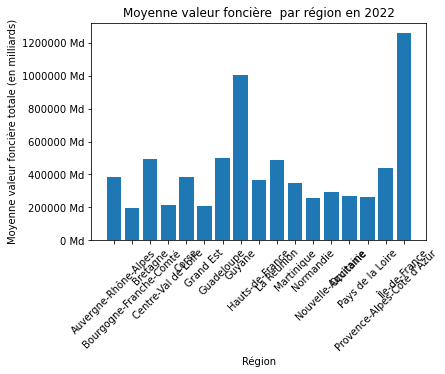

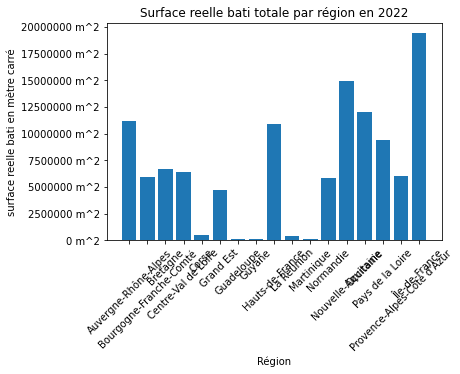

In [87]:
# Calculate total "Valeur foncière" by region
region_prices = VF_2022.groupby('Region')['Valeur fonciere'].mean()

# Create a bar plot
plt.bar(range(len(region_prices)), region_prices.values)

# Format the y-axis in billions
formatter = ticker.FuncFormatter(lambda x, pos: '{:1.0f} Md'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Add labels and title
plt.xlabel('Région')
plt.ylabel('Moyenne valeur foncière totale (en milliards)')
plt.title('Moyenne valeur foncière  par région en 2022')

# Set the x-axis tick labels to region names
plt.xticks(range(len(region_prices)), region_prices.index, rotation=45)

# Show the bar plot
plt.show()

# Calculate total "Surface totale" by region
region_prices = VF_2022.groupby('Region')['Surface reelle bati'].sum()

# Create a bar plot
plt.bar(range(len(region_prices)), region_prices.values)

# Format the y-axis in billions
formatter = ticker.FuncFormatter(lambda x, pos: '{:1.0f} m^2'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Add labels and title
plt.xlabel('Région')
plt.ylabel('surface reelle bati en mètre carré')
plt.title('Surface reelle bati totale par région en 2022')

# Set the x-axis tick labels to region names
plt.xticks(range(len(region_prices)), region_prices.index, rotation=45)

# Show the bar plot
plt.show()





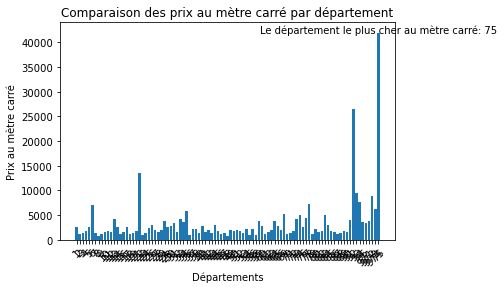

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Filtrer les données par département et calculer le prix au mètre carré pour chaque département
departements = VF_2022["Code departement"].unique()

prix_m2_departements = []
for departement in departements:
    data = VF_2022.loc[VF_2022["Code departement"] == departement]
    data = data[(data["Surface reelle bati"] != 0)]
    data = data.dropna(subset=["Surface reelle bati"])
    data['sort_val'] = data["Valeur fonciere"] / data["Surface reelle bati"]
    prix_m2 = data["Valeur fonciere"].sum() / data["Surface reelle bati"].sum()
    prix_m2_departements.append(prix_m2)

# Convertir les valeurs des départements en chaînes de caractères
departements = departements.astype(str)

# Trouver l'indice du département le plus cher
indice_departement_plus_cher = prix_m2_departements.index(max(prix_m2_departements))
departement_plus_cher = departements[indice_departement_plus_cher]

# Tracer le graphique des prix au mètre carré par département
plt.bar(departements, prix_m2_departements)
plt.title('Comparaison des prix au mètre carré par département')
plt.xlabel('Départements')
plt.ylabel('Prix au mètre carré')
plt.xticks(rotation=45)

# Afficher le département le plus cher
plt.text(indice_departement_plus_cher, max(prix_m2_departements), f"Le département le plus cher au mètre carré: {departement_plus_cher}", ha='center')

plt.show()


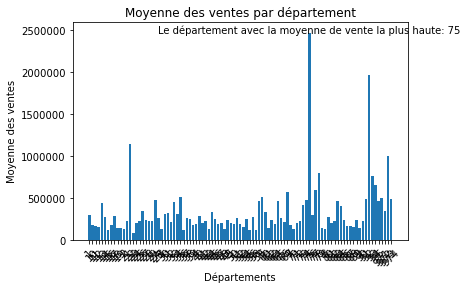

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculer la moyenne des ventes par département
moyenne_ventes_departements = VF_2022.groupby("Code departement")["Valeur fonciere"].mean()

# Convertir les codes départementaux en chaînes de caractères
departements = moyenne_ventes_departements.index.astype(str)

# Trouver l'indice du département avec la moyenne des ventes maximale
indice_departement_max = moyenne_ventes_departements.argmax()
departement_max = departements[indice_departement_max]
valeur_max = moyenne_ventes_departements.max()

# Tracer le graphique de la moyenne des ventes par département
plt.bar(departements, moyenne_ventes_departements)
plt.title("Moyenne des ventes par département")
plt.xlabel("Départements")
plt.ylabel("Moyenne des ventes")
plt.xticks(rotation=45)

# Formater les étiquettes d'axe
plt.ticklabel_format(style='plain', axis='y')

# Afficher le département avec la moyenne des ventes maximale
plt.text(indice_departement_max, valeur_max, f"Le département avec la moyenne de vente la plus haute: {departement_max}", ha='center')

plt.show()




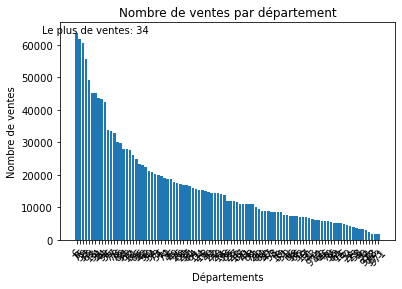

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Compter le nombre de ventes par département
nombre_ventes_departements = VF_2022["Code departement"].value_counts()

# Convertir les codes départementaux en chaînes de caractères
departements = nombre_ventes_departements.index.astype(str)

# Trouver l'indice du département avec le plus grand nombre de ventes
indice_departement_plus_ventes = nombre_ventes_departements.idxmax()
departement_plus_ventes = departements[indice_departement_plus_ventes]

# Tracer le graphique du nombre de ventes par département
plt.bar(departements, nombre_ventes_departements)
plt.title("Nombre de ventes par département")
plt.xlabel("Départements")
plt.ylabel("Nombre de ventes")
plt.xticks(rotation=45)

# Afficher le département avec le plus grand nombre de ventes
plt.text(indice_departement_plus_ventes, max(nombre_ventes_departements), f"Le plus de ventes: {departement_plus_ventes}", ha='center')

plt.show()



Code postal
75001.0    3.804774e+06
75002.0    4.706299e+06
75003.0    2.205211e+06
75004.0    3.651671e+06
75005.0    1.444626e+06
75006.0    1.866966e+06
75007.0    2.310514e+06
75008.0    2.577899e+07
75009.0    3.597366e+06
75010.0    2.450582e+06
75011.0    1.128768e+06
75012.0    7.732539e+05
75013.0    1.203132e+06
75014.0    1.235568e+06
75015.0    9.703922e+05
75016.0    1.839806e+06
75017.0    2.525336e+06
75018.0    9.200414e+05
75019.0    1.032533e+06
75020.0    7.250858e+05
Name: Valeur fonciere, dtype: float64


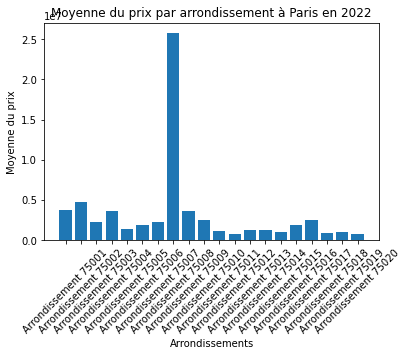

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrer les ventes avec le code département 75
ventes_paris = VF_2022[VF_2022["Code departement"] == '75']

# Calculer la moyenne du prix par arrondissement
moyenne_prix_arrondissements = ventes_paris.groupby("Code postal")["Valeur fonciere"].mean()

# Formater les étiquettes des arrondissements
arrondissements = ["Arrondissement " + str(int(arr)).zfill(2) for arr in moyenne_prix_arrondissements.index.tolist()]

# Afficher la moyenne du prix par arrondissement
print(moyenne_prix_arrondissements)

# Tracer le graphique de la moyenne du prix par arrondissement
plt.bar(arrondissements, moyenne_prix_arrondissements)
plt.title("Moyenne du prix par arrondissement à Paris en 2022")
plt.xlabel("Arrondissements")
plt.ylabel("Moyenne du prix")
plt.xticks(rotation=45)

plt.show()





In [115]:
import pandas as pd
import geopandas as gpd
import folium
# Charger les données à partir du fichier CSV
#valeursfoncieres_2022 = pd.read_csv("valeursfoncieres-2022.txt", sep="|")

# Filtrer les données pour Paris
paris_data = VF_2022[VF_2022['Code departement'] == '75']

paris_data['Arrondissement'] = paris_data['Code postal'].apply(lambda x: str(x)[3:5])

# Charger les données géographiques des quartiers ou arrondissements de Paris
quartiers_paris = gpd.read_file('arrondissements.geojson')

# Fusionner les données des prix moyens du mètre carré avec les données géographiques des quartiers de Paris

quartiers_merged = quartiers_paris.merge(paris_data.groupby('Arrondissement')['Valeur fonciere'].mean(), left_on="code", right_index=True)

# Créer une carte interactive
m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

# Ajouter les données des prix moyens du mètre carré à la carte
folium.Choropleth(
    geo_data=quartiers_merged,
    name='Prix moyen du mètre carré',
    data=quartiers_merged,
    columns=['code', 'Valeur fonciere'],
    key_on='feature.properties.code',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=0.7,
    legend_name='Prix moyen du mètre carré'
).add_to(m)

# Ajouter les informations sur les arrondissements au survol
style_function = lambda x: {'fillColor': '#ffffff', 'color': '#000000', 'fillOpacity': 0.1, 'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 'color': '#000000', 'fillOpacity': 0.5, 'weight': 0.1}
tooltip = folium.features.GeoJsonTooltip(
    fields=['code', 'Valeur fonciere'],
    aliases=['Arrondissement', 'Prix moyen vente '],
    style='background-color: white; color: #333333; font-weight: bold;',
)

geojson = folium.GeoJson(
    quartiers_merged,
    style_function=style_function,
    highlight_function=highlight_function,
    tooltip=tooltip,
    name='Arrondissements'
)
m.add_child(geojson)

# Ajouter le contrôle des couches
folium.LayerControl().add_to(m)

# Afficher la carte interactive
m


C:\Users\enzoy\AppData\Local\Temp/ipykernel_4528/3351698731.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paris_data['Arrondissement'] = paris_data['Code postal'].apply(lambda x: str(x)[3:5])


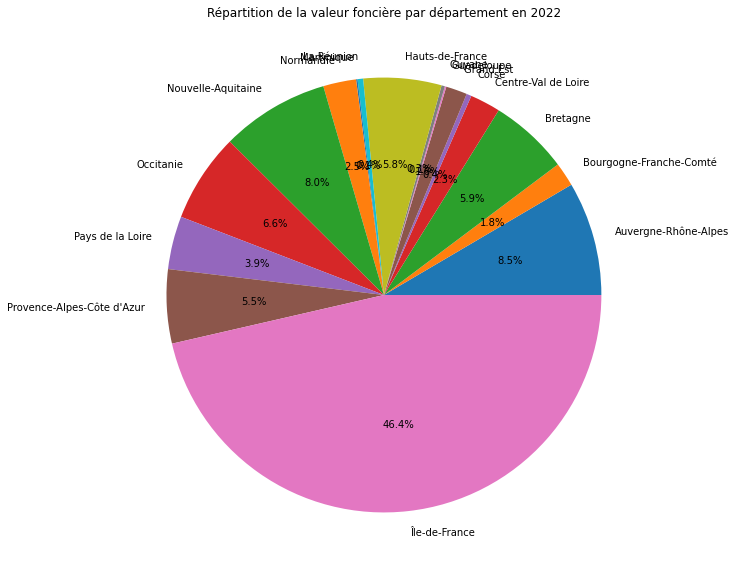

In [ ]:
# Calculate total "Valeur foncière" by department
department_prices = VF_2022.groupby('Region')['Valeur fonciere'].sum()

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(department_prices.values, labels=department_prices.index, autopct='%1.1f%%')

# Add title
plt.title('Répartition de la valeur foncière par département en 2022')

# Show the pie chart
plt.show()


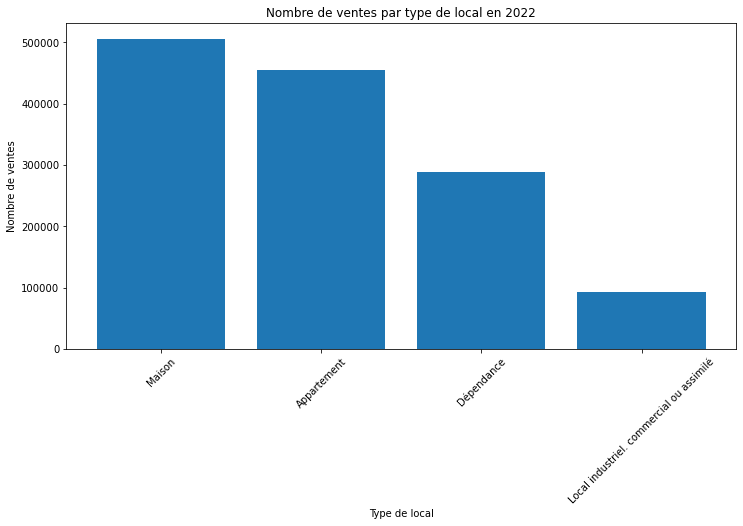

In [ ]:
# Calculate the number of sales by 'Type de local'
sales_count = VF_2022['Type local'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(sales_count)), sales_count.values)

# Add labels and title
plt.xlabel('Type de local')
plt.ylabel('Nombre de ventes')
plt.title('Nombre de ventes par type de local en 2022')

# Set the x-axis tick labels to the types of property
plt.xticks(range(len(sales_count)), sales_count.index, rotation=45)

# Show the bar plot
plt.show()



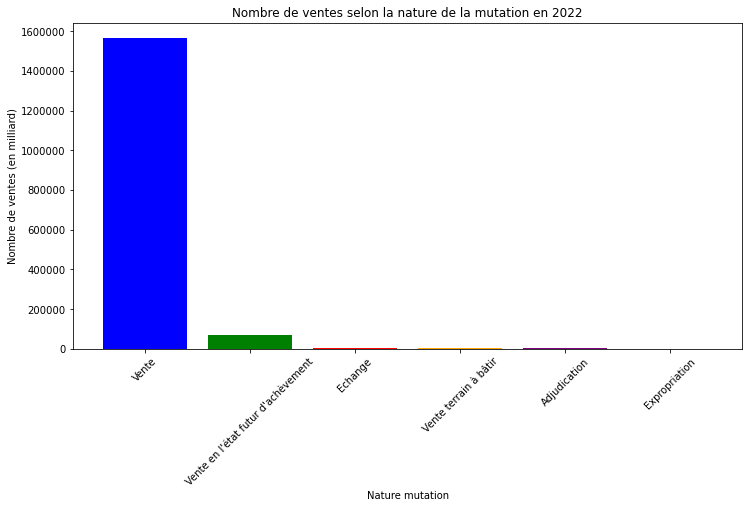

In [ ]:
# Calculate the number of sales by 'Nature mutation'
sales_count = VF_2022['Nature mutation'].value_counts()
colors = ['blue', 'green', 'red', 'orange', 'purple', 'yellow']
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(sales_count)), sales_count.values, color=colors)

# Format the y-axis ticks
formatter = ticker.FuncFormatter(lambda x, pos: '{:1.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Add labels and title
plt.xlabel('Nature mutation')
plt.ylabel('Nombre de ventes (en milliard)')
plt.title('Nombre de ventes selon la nature de la mutation en 2022')

# Set the x-axis tick labels to the types of transaction
plt.xticks(range(len(sales_count)), sales_count.index, rotation=45)

# Show the bar plot
plt.show()



In [107]:
import folium
from folium import GeoJson
import geopandas as gpd

# Read the shapefile of France departments
chemin_map = 'https://france-geojson.gregoiredavid.fr/repo/departements.geojson'
departments = gpd.read_file(chemin_map)

# Convert 'Code departement' column to string
VF_2022['Code departement'] = VF_2022['Code departement'].astype(str)

# Merge the department data with the sales count
nombre_ventes_departements = VF_2022['Code departement'].value_counts().reset_index()
nombre_ventes_departements.columns = ['Code departement', 'Nombre de ventes']
departments = departments.merge(nombre_ventes_departements, left_on='code', right_on='Code departement', how='left')

# Create a folium map centered on France
map_fr = folium.Map(location=[46.603354, 1.888334], zoom_start=6)

# Create a GeoJson layer and add it to the map
geojson = GeoJson(departments, name='Nombre de ventes', tooltip=folium.features.GeoJsonTooltip(fields=['code', 'Nombre de ventes'], aliases=['Département', 'Nombre de ventes'], sticky=True))
map_fr.add_child(geojson)

# Add a layer control panel to the map
folium.LayerControl().add_to(map_fr)

# Display the map
map_fr

- Une bonne analyse de données (chargement,nettoyage, interprétation, combinaison,
etc)



- Au minimum une vingtaine d'interprétations et visualisations pertinentes autour d'une
année (en particulier 2022 ) prix moyen du mètre carré d'un département d'une ville,
comparaison entre différents type, appart, maison, geomap, différence entre ville,
départements, régions,...
- Au minimum 5 interprétations et visualisations pertinentes en comparaison avec au
moins une autre année (en particulier avant covid)

# Comparaison avant le covid (2019) et après covid(2022)

## chargement des valeurs 2019

In [ ]:
valeursfoncieres_2019=pd.read_csv("valeursfoncieres-2019.txt", sep="|")
VF_2019 = valeursfoncieres_2019.copy()

VF_2019 = VF_2019.dropna(axis=1, how='all') #Supprime les colonnes vide
VF_2019["Date mutation"] = pd.to_datetime(VF_2019["Date mutation"].str.strip(), format="%d/%m/%Y")#Convertit Date mutation en datetime 


VF_2019["Valeur fonciere"] = VF_2019["Valeur fonciere"].astype(str).str.replace(",",".")
VF_2019["Valeur fonciere"] = VF_2019["Valeur fonciere"].replace("nan", np.nan)
VF_2019["Valeur fonciere"] = pd.to_numeric(VF_2019["Valeur fonciere"])
VF_2019["Commune"] =VF_2019["Commune"].str.replace('-',' ')
VF_2019['Code departement'] = VF_2019['Code departement'].astype(str)
VF_2019['Surface reelle bati'] = VF_2019['Surface reelle bati'].astype(float)
VF_2019['Surface Carrez du 1er lot'] = VF_2019['Surface Carrez du 1er lot'].str.replace(',', '.').astype(float)
VF_2019['Surface Carrez du 2eme lot'] = VF_2019['Surface Carrez du 2eme lot'].str.replace(',', '.').astype(float)
VF_2019['Metre carre'] = VF_2019['Surface Carrez du 1er lot'].astype(float) + VF_2019['Surface Carrez du 2eme lot'].astype(float)

VF_2019 = VF_2019.drop_duplicates(subset=['Date mutation', 'Valeur fonciere', 'Surface reelle bati', 'Metre carre'], keep='first')
VF_2019 = VF_2019.drop(['No disposition', 'No voie', 'B/T/Q', 'Code voie'], axis=1)

c:\Users\enzoy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Ajout de la région pour 2019

In [ ]:
region = {
   '01': 'Auvergne-Rhône-Alpes', '02': 'Hauts-de-France', '03': 'Auvergne-Rhône-Alpes',
    '04': 'Provence-Alpes-Côte d\'Azur', '05': 'Provence-Alpes-Côte d\'Azur',
    '06': 'Provence-Alpes-Côte d\'Azur', '07': 'Auvergne-Rhône-Alpes',
    '08': 'Grand Est', '09': 'Occitanie','10': 'Grand Est', '11': 'Occitanie',
    '12': 'Occitanie','13': 'Provence-Alpes-Côte d\'Azur',
    '14': 'Normandie','15': 'Auvergne-Rhône-Alpes',
    '16': 'Nouvelle-Aquitaine', '17': 'Nouvelle-Aquitaine',
    '18': 'Centre-Val de Loire', '19': 'Nouvelle-Aquitaine',
    '21': 'Bourgogne-Franche-Comté', '22': 'Bretagne',
    '23': 'Nouvelle-Aquitaine', '24': 'Nouvelle-Aquitaine',
    '25': 'Bourgogne-Franche-Comté','26': 'Auvergne-Rhône-Alpes',
    '27': 'Normandie', '28': 'Centre-Val de Loire',
    '29': 'Bretagne', '2A': 'Corse','2B': 'Corse','30': 'Occitanie',
    '31': 'Occitanie','32': 'Occitanie','33': 'Nouvelle-Aquitaine', '34': 'Occitanie',
    '35': 'Bretagne','36': 'Centre-Val de Loire',
    '37': 'Centre-Val de Loire','38': 'Auvergne-Rhône-Alpes',
    '39': 'Bourgogne-Franche-Comté','40': 'Nouvelle-Aquitaine',
    '41': 'Centre-Val de Loire', '42': 'Auvergne-Rhône-Alpes',
    '43': 'Auvergne-Rhône-Alpes', '44': 'Pays de la Loire',
    '45': 'Centre-Val de Loire', '46': 'Occitanie','47': 'Nouvelle-Aquitaine','48': 'Occitanie',
    '49': 'Pays de la Loire','50': 'Normandie',
    '51': 'Grand Est','52': 'Grand Est','53': 'Pays de la Loire','54': 'Grand Est',
    '55': 'Grand Est','56': 'Bretagne','57': 'Grand Est','58': 'Bourgogne-Franche-Comté',
    '59': 'Hauts-de-France','60': 'Hauts-de-France','61': 'Normandie','62': 'Hauts-de-France',
    '63': 'Auvergne-Rhône-Alpes','64': 'Nouvelle-Aquitaine',
    '65': 'Occitanie','66': 'Occitanie','67': 'Grand Est','68': 'Grand Est',
    '69': 'Auvergne-Rhône-Alpes','70': 'Bourgogne-Franche-Comté',
    '71': 'Bourgogne-Franche-Comté','72': 'Pays de la Loire',
    '73': 'Auvergne-Rhône-Alpes','74': 'Auvergne-Rhône-Alpes',
    '75': 'Île-de-France','76': 'Normandie','77': 'Île-de-France','78': 'Île-de-France',
    '79': 'Nouvelle-Aquitaine','80': 'Hauts-de-France',
    '81': 'Occitanie','82': 'Occitanie','83': 'Provence-Alpes-Côte d\'Azur','84': 'Provence-Alpes-Côte d\'Azur',
    '85': 'Pays de la Loire','86': 'Nouvelle-Aquitaine',
    '87': 'Nouvelle-Aquitaine','88': 'Grand Est','89': 'Bourgogne-Franche-Comté','90': 'Bourgogne-Franche-Comté',
    '91': 'Île-de-France','92': 'Île-de-France','93': 'Île-de-France','94': 'Île-de-France',
    '95': 'Île-de-France','971': 'Guadeloupe', '972': 'Martinique','973': 'Guyane','974': 'La Réunion','976': 'Mayotte'
}

VF_2019['Region'] = VF_2019['Code departement'].map(region)

print(VF_2019["Region"])

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
               ...      
3625897    Île-de-France
3625898    Île-de-France
3625899    Île-de-France
3625900    Île-de-France
3625902    Île-de-France
Name: Region, Length: 1684569, dtype: object


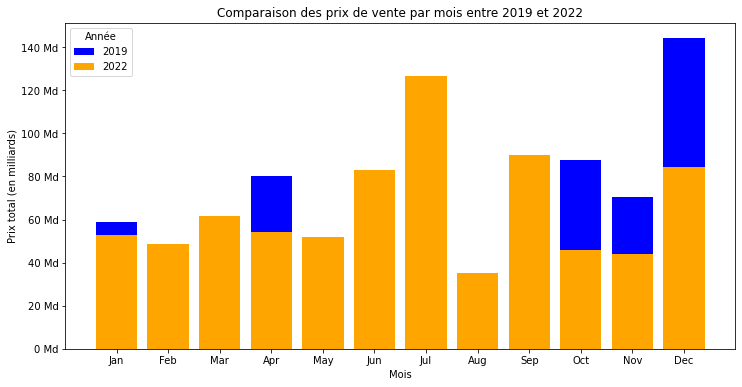

In [ ]:
# Calculate total sale prices by month in 2019
monthly_prices_2019 = VF_2019.groupby(VF_2019['Date mutation'].dt.month)['Valeur fonciere'].sum() / 1e9

# Calculate total sale prices by month in 2022
monthly_prices_2022 = VF_2022.groupby(VF_2022['Date mutation'].dt.month)['Valeur fonciere'].sum() / 1e9

# Create a bar plot with different colors for each year
plt.figure(figsize=(12, 6))
plt.bar(monthly_prices_2019.index, monthly_prices_2019.values, color='blue', label='2019')
plt.bar(monthly_prices_2022.index, monthly_prices_2022.values, color='orange', label='2022')

# Format the y-axis in billions
formatter = ticker.FuncFormatter(lambda x, pos: '{:1.0f} Md'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Replace the month labels
months = [calendar.month_abbr[i] for i in range(1, 13)]
plt.xticks(monthly_prices_2022.index, months)

# Add labels, title, and legend
plt.xlabel('Mois')
plt.ylabel('Prix total (en milliards)')
plt.title("Comparaison des prix de vente par mois entre 2019 et 2022")
plt.legend(title='Année')

# Display the bar plot
plt.show()


### On observe qu'en général 2022 est plus chère que 2019